# Projektna naloga pri predmetu programiranje

## _Analiza podatkov - primerjava nogometnih igralcev videoigre Fifa 2021_

V tej projektni nalogi bom primerjal nogometne igralce videoigre Fifa 2021 glede na njihovo starost, oceno, državljanstvo, potencial in trenutni klub. Vsi zbrani podatki so pobrani iz spletne strani [Player Stats Database - FIFA 21](https://www.fifaindex.com/players/?gender=male&order=desc). Moj vzorec zajema 5100 igralcev, med katerimi bom iskal najrazličnejše povezave in ugotovitve tudi predstavil. Najprej bom predstavil svoje hipoteze, ki jih bom nato, eno po eno, dokazal oziroma ovrgel. 

### _Hipoteze_

Glede na to, da so igralci zelo različnih starost, me bo najprej zanimalo, če imajo boljšo oceno mlajši igralci, ali pa morda starejši, izkušenejši igralci. Po mojem mnenju so v povprečju najbolje ocenjeni igralci okoli tridesetega leta starosti, ki so že bolj izkušeni, vendar pa še vedno dovolj mladostni, da lahko igrajo izvrsten nogomet. Ker sem iz spletne strani pobral podatek tudi o številu ogledov igralca v zadnjih 24 urah, bom lahko iskal povezavo med igralnim klubom in številom ogledov. Predvidevam, da bodo imeli največ ogledov igralci, ki igrajo v nekaterih boljših evropskih klubih (FC Barcelona, Real Madrid, Bayern Munchen, PSG, Manchester City...). Ogledal si bom pa tudi primerjavo potencialov igralcev, ki igrajo na različnih igralnih položajih. Menim, da imajo povprečno več potenciala napadalni in vezni igralci, kot pa vratarji in obrambni igralci. Moje hipoteze se torej glasijo:
   * najbolje ocenjeni so igralci okoli tridesetega leta starosti,
   * največ ogledov imajo igralci znanih _evropskih_ klubov,
   * več potenciala od ombrambnih nogometašev in golmanov imajo napadalci.

In [1]:
import pandas as pd

In [2]:
igralci = pd.read_csv('D:\Programiranje1\Projektna_naloga\Analiza_podatkov\obdelani-podatki\igralci.csv', index_col='id')

Za začetek bom samo pokazal najbojših 10 igralcev:

In [3]:
najboljsih_10 = igralci.sort_values('ocena', ascending=False).head(10)

In [4]:
najboljsih_10[['ime_in_priimek', 'ocena']]

,ime_in_priimek,ocena
id,,
158023,Lionel Messi,93
20801,Cristiano Ronaldo,92
188545,Robert Lewandowski,91
192985,Kevin De Bruyne,91
190871,Neymar Jr,91
200389,Jan Oblak,91
212831,Alisson,90
203376,Virgil van Dijk,90
231747,Kylian Mbappé,90


Sedaj pa se bom posvetil prvi hipotezi.

In [5]:
igralci_po_starosti = igralci.groupby('starost').mean()

In [6]:
igralci_po_starosti.sort_values('ocena', ascending=False)

,ocena,potencial,iskanja
starost,,,
43,77.000000,77.000000,4.000000
42,76.500000,76.500000,8.500000
32,75.320285,75.320285,2.113879
33,75.306977,75.306977,3.400000
34,74.875000,74.875000,2.072368
36,74.835616,74.835616,2.301370
35,74.791667,74.791667,3.687500
29,74.746269,74.932836,2.813433
37,74.628571,74.628571,2.400000


Opazim, da od pričakovanih vrednosti odstopata starosti 42 in 43. Predvidevam, da je to zaradi tega, ker je zelo malo igralcev s to starostjo.

In [7]:
st_igralcev_po_letih = igralci.groupby('starost').size()

In [8]:
st_igralcev_po_letih

starost
17      5
18     11
19     31
20    136
21    149
22    227
23    343
24    421
25    381
26    428
27    445
28    524
29    402
30    368
31    331
32    281
33    215
34    152
35     96
36     73
37     35
38     24
39     13
40      5
41      1
42      2
43      1
dtype: int64

Ker je igralcev določenih starosti zelo malo, so podatki nekoliko irelevantni. Omejil se bom torej le na tiste starosti, ki vsebujejo vsaj 20 igralcev.

In [9]:
igralci_po_starosti['stevilo_igralcev'] = igralci.groupby('starost').size()

In [10]:
igralci_po_starosti

,ocena,potencial,iskanja,stevilo_igralcev
starost,,,,
17,73.200000,88.400000,87.000000,5
18,72.363636,86.363636,20.090909,11
19,73.032258,85.354839,26.000000,31
20,73.507353,79.808824,11.610294,136
21,73.577181,82.993289,10.161074,149
22,73.585903,81.678414,7.502203,227
23,73.871720,80.775510,6.597668,343
24,73.710214,78.130641,3.950119,421
25,74.141732,78.104987,3.921260,381


In [11]:
relevantni_igralci_po_starosti = igralci_po_starosti[igralci_po_starosti.stevilo_igralcev > 20]

In [12]:
relevantni_igralci_po_starosti.sort_values('ocena', ascending=False)

,ocena,potencial,iskanja,stevilo_igralcev
starost,,,,
32,75.320285,75.320285,2.113879,281
33,75.306977,75.306977,3.400000,215
34,74.875000,74.875000,2.072368,152
36,74.835616,74.835616,2.301370,73
35,74.791667,74.791667,3.687500,96
29,74.746269,74.932836,2.813433,402
37,74.628571,74.628571,2.400000,35
30,74.470109,74.510870,1.711957,368
31,74.462236,74.462236,1.888218,331


Vidim, da je bila prva hipoteza _deloma pravilna_, saj imajo res najboljše ocene igralci stari okoli 30 let, vendar pa jim sledijo nekoliko starejši igralci od pričakovanega. Za boljšo preglednost bom podal še graf, ki prikazuje oceno igralcev v odvisnosti od njihove starosti.

<AxesSubplot:title={'center':'Ocena v odvisnosti od starosti'}, xlabel='starost'>

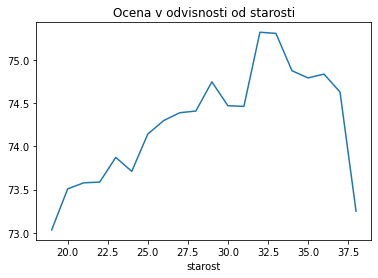

In [29]:
relevantni_igralci_po_starosti['ocena'].plot(title='Ocena v odvisnosti od starosti')

Sedaj pa bom prešel na drugo točko hipoteze. Ogledal si bom razlike v ogledih, v odvisnosti od igralnega kluba.

In [14]:
iskanja_glede_na_klub = igralci[['iskanja','klub']].groupby('klub').mean().sort_values('iskanja', ascending=False).head(15)

In [15]:
iskanja_glede_na_klub

,iskanja
klub,
FC Barcelona,49.227273
Real Madrid,33.791667
Chelsea,32.107143
Liverpool,30.500000
Manchester United,30.206897
FC Bayern München,29.863636
Manchester City,26.727273
Borussia Dortmund,25.952381
Juventus,25.409091


Druga hipoteza je očitno _potrjena_, saj med petnajst najbolj iskanimi klubi nastopajo sami evropski nogometni velikani.

<AxesSubplot:title={'center':'Število ogledov posameznega kluba'}, xlabel='klub'>

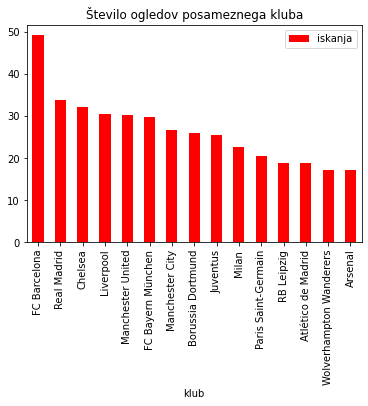

In [30]:
iskanja_glede_na_klub.plot.bar(color='red', title='Število ogledov posameznega kluba')

Tretja hipoteza pa nakazuje na povezavo med potenciali igralcev in njihovimi igralnimi polozaji.

In [17]:
polozaji = pd.read_csv('D:/Programiranje1/Projektna_naloga/Analiza_podatkov/obdelani-podatki/polozaji.csv')

In [18]:
polozaji.groupby('polozaj').size()

polozaj
CAM     719
CB      982
CDM     867
CF      153
CM     1152
GK      489
LB      551
LM      738
LW      337
LWB     109
RB      579
RM      733
RW      319
RWB     124
ST      894
dtype: int64

_Obrazložitev igralnih položajev_: 
   * vratar ima oznako GK,
   * obrambni igralci imajo eno izmed oznak CB, CDM, LB, LWB, RB, RWB,
   * vezni igralci imajo eno izmed oznak CAM, CM, LM, RM,
   * napadalni igralci imajo eno izmed oznak CF, LW, RW, ST.

In [19]:
igralci_s_polozaji = pd.merge(igralci, polozaji, left_on='id', right_on='igralec')

In [20]:
igralci_s_polozaji

,ime_in_priimek,državljanstvo,ocena,potencial,starost,iskanja,klub,igralec,polozaj
0,Iniesta,Spain,81,81,36,34,Vissel Kobe,41,CAM
1,Iniesta,Spain,81,81,36,34,Vissel Kobe,41,CM
2,Gianluigi Buffon,Italy,82,82,42,17,Juventus,1179,GK
3,Maarten Stekelenburg,Netherlands,72,72,38,1,Ajax,2147,GK
4,Tarantini,Portugal,72,72,37,0,Rio Ave FC,3281,CDM
...,...,...,...,...,...,...,...,...,...
8741,Marko Tolić,Croatia,72,76,24,2,Dinamo Zagreb,258262,RW
8742,Matěj Hybš,Czech Republic,70,70,27,0,Viktoria Plzeň,258332,LB
8743,Bruno Fuchs,Brazil,72,83,21,1,PFC CSKA Moscow,258370,CB
8744,Viktor Korniienko,Ukraine,70,79,21,2,Shakhtar Donetsk,259036,LB


In [21]:
igralci_s_polozaji[['potencial', 'polozaj']]

,potencial,polozaj
0,81,CAM
1,81,CM
2,82,GK
3,72,GK
4,72,CDM
...,...,...
8741,76,RW
8742,70,LB
8743,83,CB
8744,79,LB


In [22]:
igralci_s_polozaji[['potencial', 'polozaj']].groupby('polozaj').mean().sort_values('potencial', ascending=False)

,potencial
polozaj,
CF,78.065359
LW,78.005935
RW,77.893417
CM,77.176215
CAM,77.173853
LWB,76.972477
CDM,76.724337
GK,76.674847
CB,76.618126


<AxesSubplot:title={'center':'Potencial igralcev na različnih igralnih položajih'}, xlabel='Položaj'>

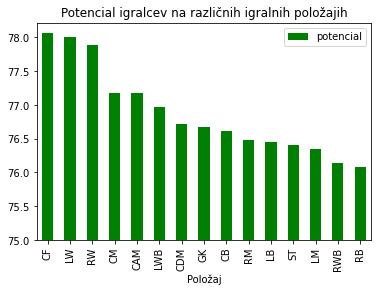

In [32]:
(igralci_s_polozaji[['potencial', 'polozaj']].groupby('polozaj').mean().sort_values('potencial', ascending=False) - 75).plot.bar(color='green', bottom= 75, title='Potencial igralcev na različnih igralnih položajih', xlabel='Položaj')

Moč je opaziti, da imajo res največ potenciala napadalci in tudi vezni igralci, presenetljivo je morda edino to, da imajo tudi vratarji sorazmerno veliko potenciala. Vsekakor bi pa dejal, da je tretja hipoteza _potrjena_.

Za zanimivost bi pa pokazal še, katere so povprečno najboljše države. Zaradi večje natančnosti bom upošteval le države, ki imajo vsaj 10 igralcev.

In [24]:
drzave = igralci.groupby('državljanstvo').mean()

In [25]:
drzave['število igralcev'] = igralci.groupby('državljanstvo').size()

In [26]:
drzave[drzave['število igralcev'] > 9]['ocena'].sort_values(ascending=False).head(15)

državljanstvo
Slovenia       76.117647
Algeria        75.500000
Spain          75.353579
Portugal       75.266667
France         75.219219
Uruguay        75.116667
Belgium        75.049020
Italy          74.977901
Serbia         74.963636
Switzerland    74.920000
Netherlands    74.898551
England        74.816794
Germany        74.670455
Senegal        74.581395
Morocco        74.581395
Name: ocena, dtype: float64

Očitno je Slovenija povprečno najboljša država, kar pa se žal ne pokaže v kakšni pretirano dobri igri slovenske reprezentance. Glavni razlog za tako dobro slovensko oceno je nekaj izjemnih posameznikov (npr. Jan Oblak z oceno 91) in pa relativno malo slovenskih nogometašev v tem vzorcu ( Slovencev je 17, med tem ko je največ Brazilcev, kar 532).

### Rezultati

Na začetku sem postavil tri hipoteze. Dve sta bili potrjeni, ena pa je bila potrjena le deloma. Precej očitno je, da so v klubskem nogometu precej v ospredju evropski nogometni klubi, od reprezentanc pa, vsaj po številu igralcev izstopajo Brazilija (532), Španija (461), Argentina (383) in Francija (333). Bolje so ocenjeni starejši, izkušenejši igralci, največ potenciala pa imajo igralci na napadalnih položajih. Tudi Slovenija pa, vsaj statistično gledano, kroji sam vrh svetovnega nogometa, tako da upam, da bo čimprej nekaj teoretičnih uspehov prenesla tudi na nogometna igrišča.